# Generating a Mock Sample of a Multidimensional Space

## Importing Modules

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

## Define the Parameters
- The number of samples
- The number of dimensions
- The number of components

In [98]:
num_dimensions = 2  # Number of dimensions
num_components = 7  # Number of Gaussian components
num_samples = 5000  # Number of samples
separation_factor = 50  # Factor to scale the separation of Gaussian means
error_std = 0.5  # Standard deviation of errors

## Generating the Data

In [99]:
def generate_mock_data_with_errors(num_dimensions, num_components, num_samples, separation_factor, error_std=0.1):
    """
    Generate mock data from a Gaussian Mixture Model and add mock errors.

    Parameters:
        num_dimensions (int): Number of dimensions.
        num_components (int): Number of Gaussian components.
        num_samples (int): Number of samples to generate.
        separation_factor (float): Factor to scale the separation of Gaussian means.
        error_std (float): Standard deviation of the errors.

    Returns:
        X (numpy.ndarray): The sampled data points with errors (num_samples x num_dimensions).
        y (numpy.ndarray): The labels for the components (num_samples,).
        errors (numpy.ndarray): The mock errors added to the data (num_samples x num_dimensions).
    """
    # Step 1: Randomly generate means for the Gaussian components
    # Each component will have a mean vector of length `num_dimensions`.
    # The values are uniformly sampled and scaled by `separation_factor` to spread them out.
    means = np.random.rand(num_components, num_dimensions) * separation_factor  # Random means

    # Step 2: Generate covariances for each Gaussian component
    # We assume diagonal covariance matrices for simplicity.
    # For each component, create a diagonal matrix where the diagonal elements
    # are sampled from a uniform distribution and shifted by 0.5 to ensure non-zero variance.
    covariances = [np.diag(np.random.rand(num_dimensions) + 0.5) for _ in range(num_components)]  # Diagonal covariances

    # Step 3: Generate mixture weights for the components
    # Weights determine the proportion of data points generated by each component.
    # The weights are sampled from a Dirichlet distribution, ensuring they sum to 1.
    weights = np.random.dirichlet(np.ones(num_components), size=1).flatten()  # Generate weights that sum to 1

    # Step 4: Initialize a GaussianMixture object
    # This object models the Gaussian mixture but won't be "fitted" in the usual sense.
    gmm = GaussianMixture(n_components=num_components, covariance_type='full', random_state=42)

    # Step 5: Manually set the GMM parameters 
    # Assign the generated means, covariances, and weights to the GaussianMixture object.
    gmm.means_ = means  # Assign the means
    gmm.covariances_ = covariances  # Assign the covariances

    # Compute the precision matrices (inverse of covariance)
    # This is needed for the GaussianMixture object to properly sample data.
    gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covariances))
    gmm.weights_ = weights  # Set weights for the mixture components

    # Step 6: Generate synthetic data
    # Use the `.sample()` method of the GaussianMixture object to generate `num_samples` data points.
    # Returns:
    #   X: The generated data points (array of shape [num_samples, num_dimensions])
    #   y: The component labels for each data point (array of shape [num_samples])
    X, y = gmm.sample(num_samples)

    # Step 7: Generate mock errors
    # Errors are random deviations added to each data point.
    errors = np.random.normal(0, error_std, size=X.shape)  # Errors with mean 0 and std `error_std`

    # Step 8: Add errors to the original data
    X = X + errors

    # Step 9: Return the generated data with errors, labels, and errors themselves
    return X, y, errors

## Generating a plot for a two-dimensional case

In [100]:
def plot_data(X, y):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(y)
    
    for label in unique_labels:
        component_data = X[y == label]
        plt.scatter(
            component_data[:, 0], 
            component_data[:, 1], 
            label=f'Component {label}', 
            s=10
        )
    
    plt.title('Generated Data from Gaussian Mixture Model')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Components', loc='best')
    plt.show()

## Running the Functions

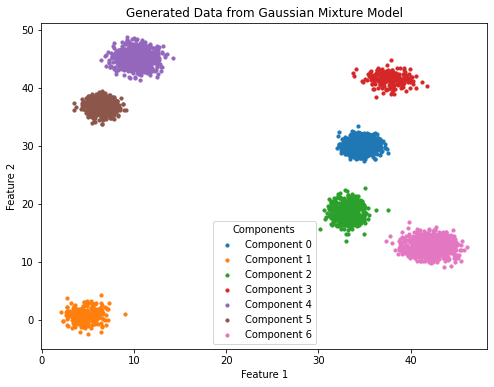

In [101]:
# Generate data with errors
X, y, errors = generate_mock_data_with_errors(num_dimensions, num_components, num_samples, separation_factor, error_std)

# Plot if 2D
if num_dimensions == 2:
    plot_data(X, y)
else:
    print(f"Data generated with {num_samples} samples in {num_dimensions} dimensions, with {num_components} components.")

## Save Sampled Data to a .csv

In [92]:
def save_data_with_errors_to_csv(X, y, errors, filename="sampled_data_with_errors.csv"):
    """
    Save sampled data, errors, and their labels to a CSV file.

    Parameters:
        X (numpy.ndarray): The sampled data points (num_samples x num_dimensions).
        y (numpy.ndarray): The labels for the components (num_samples,).
        errors (numpy.ndarray): The errors for the data points (num_samples x num_dimensions).
        filename (str): The name of the CSV file to save the data to.
    """
    # Create column names for the data dimensions and errors
    num_dimensions = X.shape[1]
    data_columns = [f"Dimension_{i+1}" for i in range(num_dimensions)]
    error_columns = [f"Error_Dimension_{i+1}" for i in range(num_dimensions)]

    # Add the component labels column
    all_columns = data_columns + error_columns + ["Component_Label"]

    # Combine the data, errors, and labels into a single DataFrame
    data_with_errors_and_labels = np.hstack((X, errors, y.reshape(-1, 1)))  # Combine X, errors, and y
    df = pd.DataFrame(data_with_errors_and_labels, columns=all_columns)

    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)
    print(f"Data with errors successfully saved to {filename}")

In [93]:
# Save to CSV
save_data_with_errors_to_csv(X, y, errors, filename="generated_data_with_errors.csv")

Data with errors successfully saved to generated_data_with_errors.csv
